# Inversion method

Probability integral transform is useful in statistics for checking goodness of fit of a distribution to a set of data while the inverse method is used for simulation.

## 1. **Probability integral transfrom**

🔴 For GOODNESS OF FIT 🔴

Data values that are modeled on being R.V. from any given distribution can be converted to a R.V. having uniform distribution. Let $X \sim F_X(x)$ define a transformation where $Y = F_X(X) \in [0,1]$. So, $X = F_X^{-1}(y)$, then $Y$ is uniform over $[0,1]$, i.e. $Y \sim Unif(0,1)$.

This result can be summarized as:

**Theorem:** if X has CDF F, then F(x) has unif(0,1) distribution.

**Proof:**

$$F_y(y) = P(Y<=y) = P(F_x(x) <= y) = P(x <= F_x^{-1}(y)) = F_x(F_x^{-1}(y)) = y$$

So, $F_y(y) = P(Y<=y) = y$, then $Y \sim Unif(0,1)$.

## 2. **Inverse probability integral transform**

🔴 For SIMULATION OF R.V.🔴

Here, we start from $Unif(0,1)$ and going to $Y = F_X(x)$. This is helpful because it's easy to get a $Unif(0,1)$. From here, you can get a more complicated solution.

*Start from the uniform distribution and do the inverse procedure*

**Theorem:** suppose $X \sim U(0,1)$, i.e. $F_X(x) = x$, $\forall x \in [0,1]$. Let $Y = F^{-1}(x)$, then $X = F(y)$, where $F(\cdot)$ is a non-decreasing absolutely continuous function, then $Y$ has the CDF corresponding to $F$.

**Proof:**

Need to prove that $F_Y(y) = F(y)$.

$$F_Y(y) = P(Y <= y) = P(F^{-1}(x) <= y) = P(x <= F(y)) = F(y)$$


## **Inversion method**

Suppose we want to simulate $X$ whose distribution has a given CDF, $F$. If $F$ is continuous and strictly increasing, then $F^{-1}$ exists. Now, sampling $U \sim Unif(0,1)$ and setting $X = F^{-1}(u)$ does the job. This means that if $X$ has CDF $F$, then $F^{-1}(u)$ will have CDF $F$, so if you are able to calculate $F^{-1}$, and can gather uniform, then you can generate a sample from $F$.

### Example 1: Generate a random sample of a distribution with $F(x) = x / (1 + x)$.

To get F^{-1}(y), specify a value for y and solve for x.  

$$y = x / (1 + x)$$

$$x = y / (1 - y)$$

So, $F^{-1}(y) = y / (1 - y)$. This means that $u / (1 - u)$ will have CDF $F$. Therefore, the algorithm is:

1. Generate uniform distribution, $ U \sim Unif(0,1)$

2. Set $x = u / (1 - u)$

3. Conduct this multiple times to sample the distribution


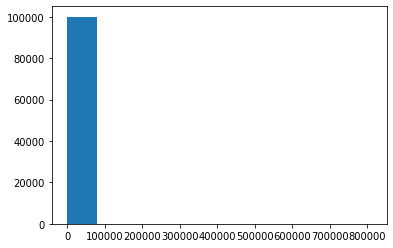

In [1]:
import numpy as np
import matplotlib.pyplot as plt

u = np.random.uniform(0, 1, 100000)

# samples
samples = u / (1 - u)

plt.hist(samples)
plt.show()

### Example 2: Generate random sample of exponential distribution with rate $\lambda$

We know $f(x) = \lambda \exp (-\lambda x )$ where $x \geq 0$. Therefore, $F(x) = 1 - \exp(-\lambda x)$.

To calculate $F^{-1}(y), specify a value for $y$ and solve for $x$.

$$y = 1 - \exp(- \lambda x)$$

$$x = \frac{-1}{\lambda} \log (1 - y)$$

Therefore, $x = F^{-1}(y) = - \frac{1}{\lambda} \log (1 - y)$.

This means that if $U \in [0,1]$, then $F^{-1}(U) = -\frac{1}{\lambda} \log (1 - U) \sim Exp(\lambda)$

To generate samples, 

1. Sample $U \sim Unif(0,1)$

2. Set $x = -\frac{1}{\lambda} \log(1 - u)$



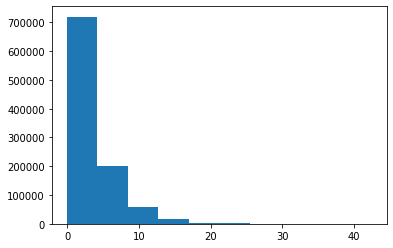

In [2]:
import numpy as np
import matplotlib.pyplot as plt

u = np.random.uniform(0, 1, 1000000)

lambd = 0.3

# samples
samples =- (1 / lambd) * np.log(1 - u)

plt.hist(samples)
plt.show()

### Example 3: Generate random sample of the (standard) normal distribution

We know $f(x) = \frac{1}{\sqrt{2\pi}} \exp( - \frac{x^2}{2} )$, where $-\infty < x < \infty$

The CDF $F(x)$ does not have a closed form. 

$$\Phi (x) = \int_{-\int}^x \frac{1}{\sqrt{2\pi}} \exp(- \frac{x^2}{2} ) dx$$

In many cases, you cannot invert the CDF (i.e. normal distribution, t-distribution)

A normal R.V. can, in principle, can be generated using the inversion method. However, this requires evaluations of the standard normal inverse CDF, which is a non-trivial calculation. There [are ways](https://stats.stackexchange.com/questions/16334/how-to-sample-from-a-normal-distribution-with-known-mean-and-variance-using-a-co) of sampling this distribution.

## 3. Transformation Methods

This is the case where distribution $F$ is linked in a simple way to another distribution easy to simulate.

### Sampling normal RVs

There are a number of fast and efficient alternatives for generating normal RVs. 

#### **Box-Muller algorithm**

Box-Muller is based on some trigonometric transformations.

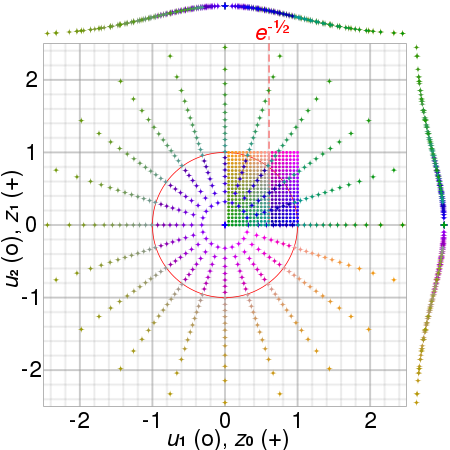

In [3]:
from utils import disp
disp('box-muller.png')

This method generates a pair of normal RVs $X$ and $Y$. Let $X \sim N(0,1)$ and $Y \sim N(0,1)$ be independent. Box-Muller sampling is based on representing the joint distribution of 2 independent standard normal variables in polar coordinates. The joint distribtion $p(x,y)$ which is circular-symmetric is 

$$p(x,y) = p(x) \times p(y) = (\frac{1}{\sqrt{2\pi}} \exp( -\frac{x^2}{2} ))(\frac{1}{\sqrt{2\pi}} \exp (-\frac{y^2}{2} ))$$

$$ = \frac{1}{2\pi} \exp( - (x^2 + y^2) / 2) = \frac{1}{2\pi} \exp ( -r^2 / 2)$$

where $r^2 = x^2 + y^2$. Therefore, 

$$p(r, \theta) = \frac{1}{2\pi} \exp ( -r^2 / 2 )$$

is the joint density of $r^2 \sim \chi_2^2$ (or $\exp(1/2)$) and $\theta \sim Unif(0, 2\pi)$.

This is because: $x^2 \sim \chi_1^2$, $y^2 \sim \chi_1^2$, x and y are independent. Therefore, $x^2 + y^2 \sim \chi_2^2$

It follows that normal RVs can be generated from $\chi^2$ and uniform. 

If $X \sim N(0,1)$, $Y \sim N(0,1)$ and independent, then 

$$X^2 + Y^2 = -2 \log{ U_1} \sim \chi_2^2$$

where $U_1 \sim Unif(0,1)$.

$- \log {x}$ comes from the inverse of the exponential distribution.

#### Question: Given that $x^2 + y^2 = -2 \log{U_1}$, how do we find X and Y?

Define $\theta$ as a random angle between $X$ and $r$ where $r^2 = x^2 + y^2$. Then, $\theta \sim Unif(0, 2\pi)$.


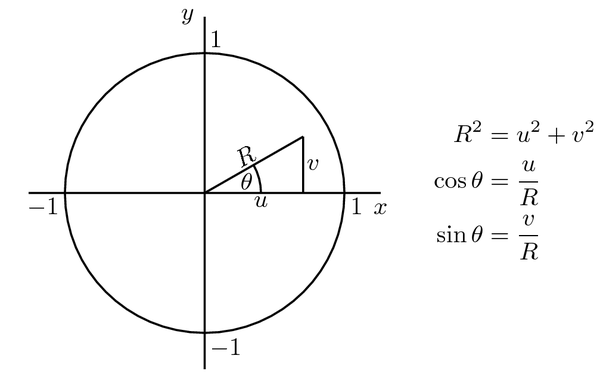

In [4]:
disp('box_muller_coordinates.png')

$$x = r \cos \theta = \sqrt{ -2 \log U_1 } \cos (2\pi U_2)$$

$$y = r \sin \theta = \sqrt{ -2 \log U_1 } \sin (2\pi U_2)$$

where $U_2 = \frac{\theta}{2\pi} \sim Unif(0,1)$ because as we stated above, $\theta \sim Unif(0, 2\pi)$.


**Justification**: Let $x^2 + y^2 = -2 \log U_1$. Therefore, $u_1 = \exp ( -\frac{x^2+y^2}{2} )$. 

$$\tan (2\pi U_2) = Y / X $$

$$U_2 = \frac{1}{2\pi} tan^{-1} (Y/X)$$

The Jacobian of the polar transformation is 

$$| \frac{\delta (u_1, u_2)}{\delta{x,y}}| = \frac{1}{2\pi} \exp { - \frac{x^2 + y^2}{2}}$$

By the formulat for the random vairable transformation, we have

$$f(x,y) = f(u_1, u_2) | \frac{\delta (u_1, u_2)}{\delta{x,y}}| = \frac{1}{2\pi} \exp {-\frac{1}{2} (x^2 + y^2)}$$

Hence, $X$ and $Y$ are independent N(0,1).


**We want to generate a random normal sample. To do this, we simply **

1. Sample $U \sim Unif(0,1)$ and $V \sim Unif(0,1)$

2. Set $x = r \cos \theta = \sqrt{ -2 \log U } \cos (2\pi V)$ and $x = r \cos \theta = \sqrt{ -2 \log U } \sin (2\pi V)$

3. Take a linear function to get different mean and variance ($\mu$, $\sigma$)


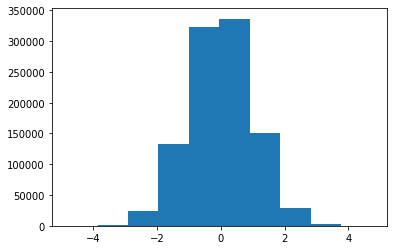

In [5]:
import numpy as np
import matplotlib.pyplot as plt

u = np.random.uniform(0,1,1000000)
v = np.random.uniform(0,1,1000000)

samples = np.sqrt(-2 * np.log(u)) * np.cos(2 * np.pi * v)

plt.hist(samples)
plt.show()

To get a normal distribution, simply evaluate $x = \mu + z \sigma \sim N(\mu, \sigma)$.

Several other useful transformation identities exist!

### Chi-squared

If $x_1, x_2, ..., x_k \sim N(0,1)$ independent, then $\sum_{i=1}^k X_i^2 \sim \chi_k^2$

### Gamma 

If $x_1, x_2, ..., x_k \sim exp(\lambda)$ independent, then $\sum_{i=1}^k X_i \sim Gamma(k, \lambda)$

**Reminder**: we can get exponential by going from uniform to exponential and can get gamma by summing exponentials

### Beta

If $X_1 \sim Gamm(\alpha, \lambda)$ and $X_2 \sim Gamm(\beta, \lambda)$ independent, then $\frac{X_1}{X_1 + X_2} \sim Beta(\alpha, \beta)$

### t

If $Z\sim N(0,1)$ and $Y\sim \chi_\nu^2$ independent, then $X = \frac{Z}{\sqrt{Y / \nu}} \sim t_\nu$

### F

If $X\sim t_{(df)}$ then $X^2 \sim F(1, df)$


## Indirect Sampling techniques

Sample from a different distribution to generate samples from a target distribution.
For example, a laplace (or double exponential) distribution can be used to approximate the normal distribution.

### Majorization

Suppose we want to sample from a distribution with PDF $f$.
Suppose, further, that $f(u) \leq h(u) = M g(u), \allof u$ where $M$ is a constant > 1 and $g(u)$ is a (simple) pdf.
By simple, we mean it's a pdf which is able to be defined easily (i.e. exponential)

We say that $h(u)$ majorizes $f(u)$.

The goal is to use samples from the (easy to generate) pdf $g(u)$ as "approximate samples" from $f(u)$.
But it is clear that unless $g(u) \approx f(u), \allof u$, there will be samples from $g$ that are not representative of $f$.
The idea is to throw away these "bad" samples using the **accept-reject algorithm (A.R. algo.)**.
Rjecetion algorithm is a general algorithm to generate samples froma  distribution with density $f$ (called the target denstiy) based only on the ability to generate from another distribution with density $g$ (usually referred to as the proposal density) s.t. 

$$sup_x \frac{f(x)}{g(x)} \leq M < \infty$$

The basic algorithm is A.R. algorithm.

Step 1: Generate $Y \sim g$ as proposal.

Step 2: Generate $U \sim Unif(0,1)$.

Step 3: If $U \leq \frac{f(Y)}{M g(Y)}, set $X = Y$ (aka use as a sample). Otherwise, return to step 1 (aka reject sample).

We are not generating anything from $X$. Everything is from $Y$. Our proposal $g$ is easier to sample than $f$.

**IMPORTANT**: $g$ must have the same support as $f$.

**Theorem**: (Part 1) The random variable generated by the A.R. algorithm has density $f$. (Part 2) The number of iterations in the A.R. algorithm follows a geometric distribution with mean $M$.

**Proof:** (Part 2) The unconditoinal probability of acceptance is 

$$P(acc) = \sum_x P(acc | X=x) P(X=x)$$

by the law of conditional probability

$$= \sum_x P(U\leq \frac{f(x)}{M g(x)} | X = x) P(X = x)$$

$$= \sum_x \frac{f(x)}{M g(x)} g(x) = \sum_x \frac{f(u)}{M} = \frac{1}{M} \sum_x f(u) = \frac{1}{M}$$

Therefore, the probability to accept is $\frac{1}{M}$.

Now, let $N = $ number of iterations in algorithm to set a value of $X$, 

$$P(N = n) = \frac{1}{M} (1 - \frac{1}{M})^{n-1}, n = 1, 2, ...$$

This is the probability of $n$ iterations. This is a geometric distribution with mean $M$.

i- Want to show that hte distribution of accepted ddraws is the same as the target distribution

$$P(X = u | acc) = \frac{P(X=u, acc)}{P(acc)}$$

$$= \frac{P(acc |X = x) \times P(X=x)}{P(acc)} = \frac{P(acc | X=u) \times g(x)}{1 / M}$$

$$= \frac{f(u)}{M g(u)} \times M g(u) = f(u)$$

Since the acceptance rate is $\frac{1}{M}$, you will need, on average, to generate $M \times n$ draws from the proposal distribution $g$ and from the uniform distribution to get $n$ draws from the target distribution $f$.

It pays to find a sharp bound for $M$ 

$$M = max_{u} \frac{f(u)}{g(u)}$$

This can be solved by taking derivative and then solve for zero.

**Example** Simulate normal RVs from double exponential RVs.

Consider generating a $N(0,1)$ by using a double exponential distribution with density $g(x|\alpha) = \frac{\alpha}{2} \exp (-\alpha |x| ), \alpha > 0$, as proposal distribution.

**Solution** $g$ is the double exponential. $f$ is the normal pdf.

In order to use the A.R. algorithm, we need to find the value of $M$.

Step 1: Let $h(x) = \frac{f(x)}{f(x)}$, then M = max_x h(x)$.

$$h(x) = [ \frac{1}{\sqrt{2\pi}} \exp (- \frac{x^2}{2})] [ \frac{2}{\alpha} \exp (\alpha |x| )] $$

$$= \frac{\sqrt{2}}{\alpha \sqrt{pi}} \exp (- \frac{x^2}{2} + \alpha |x|)$$

Step 2: Differentiate h, after taking $\log$ to simplify wrt x to find the maximum while ignoring the constants in front.

$$\ln h(x) = - \frac{x^2}{2} + \alpha |x|$$

$\frac{d}{dx} \ln h(x) = -x + \alpha$ and $\frac{d}{dx} \ln h(x) = -x - \alpha$

Set equal to zero. We get $x = \pm \alpha$

Step 3: To get the maximum, we plug this back into equation of $M$.

$$M = \frac{2}{\alpha \sqrt{2\pi}} \exp (-\frac{\alpha^2}{2} + \alpha^2) = \frac{2}{\alpha \sqrt{2\pi}} \exp (\frac{\alpha^2}{2})$$

$$ = \frac{2}{\sqrt{2\pi}} \alpha^{-1} \exp (\frac{\alpha^2}{2})$$

Which depends on $\alpha$. So, 

Step 4: Minimize the differentiating wrt $\alpha$ to obtain the smallest $M$.

From earlier, we know that 

$$\ln h(x) = - \frac{x^2}{2} + \alpha |x|$$

We know that the smallest value of $\ln h(x)$ occurs at the smallest $\alpha$. 


